# MASK
This notebook contains the passages applied to masking out relevant areas. First of all the areas corresponding to the relevant parts highlighted by CAM-based techniques. Then the areas corresponding to the failed components of the pictures segmented using external tools.

# Libraries

In [19]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
# from PIL import Image

# Modify and save maps

In [29]:
results_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\results'
new_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\masked\\grey' # modify the destination dir
image_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\Defective'

In [30]:
# parameters
maps = ['AblationCAM',
 'EigenCAM',
 'EigenGradCAM',
 'FullGrad',
 'GradCAM',
 'GradCAMElementWise',
 'GradCAMPlusPlus',
 'HiResCAM',
 'LayerCAM',
 'XGradCAM'
 ]

threshold = 0.4 # !!!!!!!!

In [31]:
# let's create a dictionary name - value r,g,b
dict_image_rgb = {
    'b05_r1_sl1_d105' : [6, 121, 46],
    'b06_r1_sl2_d200' : [26, 85, 37],
    'b07_r3_sl1_d170' : [1, 162, 68],
    'b11_r4_sl1_d255' : [72, 99, 82],
    'b12_r2_sl1_d170' : [16, 63, 27],
    'b13_r2_sl2_d080' : [8, 79, 21],
    'f02_r1_sl1_d060' : [0, 122, 49],
    'f03_r2_sl3_d135' : [51, 95, 72],
    'f04_r3_sl3_d340' : [0, 61, 14],
    'f05_r1_sl1_d240' : [10, 145, 68],
    'f06_r1_sl3_d020' : [2, 97, 33],
    'f07_r1_sl2_d010' : [8, 41, 22],
    'f11_r4_sl1_d060' : [96, 120, 96],
    'f12_r1_sl3_d030' : [82, 104, 83],
}

In [32]:
# let's create a dictionary name - value r,g,b
dict_image_grey = {
    'b05_r1_sl1_d105' : [206, 206, 218],
    'b06_r1_sl2_d200' : [110, 118, 120],
    'b07_r3_sl1_d170' : [206, 210, 221],
    'b11_r4_sl1_d255' : [152, 161, 170],
    'b12_r2_sl1_d170' : [108, 122, 122],
    'b13_r2_sl2_d080' : [214, 214, 216],
    'f02_r1_sl1_d060' : [210, 213, 218],
    'f03_r2_sl3_d135' : [113, 154, 158],
    'f04_r3_sl3_d340' : [206, 213, 223],
    'f05_r1_sl1_d240' : [209, 210, 212],
    'f06_r1_sl3_d020' : [192, 191, 197],
    'f07_r1_sl2_d010' : [196, 207, 209],
    'f11_r4_sl1_d060' : [156, 164, 175],
    'f12_r1_sl3_d030' : [153, 165, 179],
}

In [33]:
# -- per mappa di gradcam
for mappa in maps:
    for path, dirs, files in os.walk(results_dir + '\\' + mappa + '\\' + 'defective_cam'):
        for file in tqdm(files):
            
            filename, ext = os.path.splitext(file)
            
            if 'result' not in filename: 
                # importare la mappa di gradcam
                image = np.loadtxt(path + '\\' + file, delimiter=',')
                image = image.tolist()
                
                original = imread(image_dir + '\\' + filename + '.jpg')
                original = original.copy()

                # out = np.zeros((768, 1024, 4), dtype = np.uint8)
                
                # selezionare i pixels maggiori della treshold come matrice bidimensionale di 0 e 1
                for i in range(len(image)):
                    for j in range(len(image[0])):
                        if image[i][j] >= threshold:
                            original[i][j] = np.array(dict_image_grey[filename], dtype = np.uint8)
                            # original[i][j] = np.array([255, 255, 255], dtype = np.uint8)
                            # original[i][j] = np.random.randint(256, size = 3, dtype=np.uint8)
                        
                # # salvare la nuova matrice
                plt.imsave(f'{new_dir}\\{mappa}\\{filename}_results.jpg', original)
                # np.savetxt(new_dir + '\\' + mappa + '\\' + filename + '_results.csv', image, delimiter=',')

100%|██████████| 14/14 [00:15<00:00,  1.13s/it]


### Test

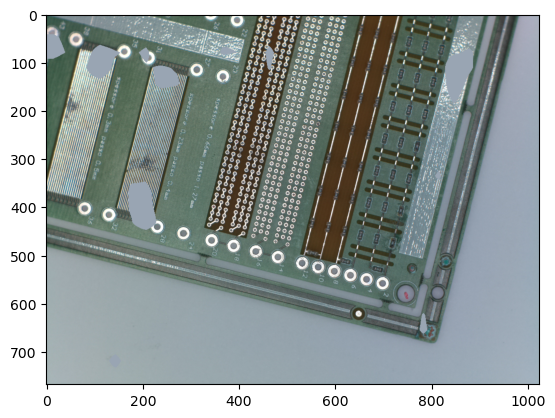

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure()
plt.imshow(original)
plt.show()
plt.clf()

# Modify and save images

In [34]:
results_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\masking_dataset_failure\\random'
new_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\segmentation_mask_1.1\\SegmentationClass'
image_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\Defective'

In [35]:
# let's create a dictionary name - value r,g,b
dict_image_rgb = {
    'b05_r1_sl1_d105' : [6, 121, 46],
    'b06_r1_sl2_d200' : [26, 85, 37],
    'b07_r3_sl1_d170' : [1, 162, 68],
    'b11_r4_sl1_d255' : [72, 99, 82],
    'b12_r2_sl1_d170' : [16, 63, 27],
    'b13_r2_sl2_d080' : [8, 79, 21],
    'f02_r1_sl1_d060' : [0, 122, 49],
    'f03_r2_sl3_d135' : [51, 95, 72],
    'f04_r3_sl3_d340' : [0, 61, 14],
    'f05_r1_sl1_d240' : [10, 145, 68],
    'f06_r1_sl3_d020' : [2, 97, 33],
    'f07_r1_sl2_d010' : [8, 41, 22],
    'f11_r4_sl1_d060' : [96, 120, 96],
    'f12_r1_sl3_d030' : [82, 104, 83],
}

In [36]:
# let's create a dictionary name - value r,g,b
dict_image_grey = {
    'b05_r1_sl1_d105' : [206, 206, 218],
    'b06_r1_sl2_d200' : [110, 118, 120],
    'b07_r3_sl1_d170' : [206, 210, 221],
    'b11_r4_sl1_d255' : [152, 161, 170],
    'b12_r2_sl1_d170' : [108, 122, 122],
    'b13_r2_sl2_d080' : [214, 214, 216],
    'f02_r1_sl1_d060' : [210, 213, 218],
    'f03_r2_sl3_d135' : [113, 154, 158],
    'f04_r3_sl3_d340' : [206, 213, 223],
    'f05_r1_sl1_d240' : [209, 210, 212],
    'f06_r1_sl3_d020' : [192, 191, 197],
    'f07_r1_sl2_d010' : [196, 207, 209],
    'f11_r4_sl1_d060' : [156, 164, 175],
    'f12_r1_sl3_d030' : [153, 165, 179],
}

In [41]:
results_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\masking_dataset_failure\\random'
new_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\segmentation_mask_1.1\\SegmentationClass'
image_dir = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\grad-cam\\Defective'

for path, dirs, files in os.walk(image_dir):
    for file in tqdm(files):
        
        filename, ext = os.path.splitext(file)
        
        if 'result' not in filename: 
            
            original = imread(image_dir + '\\' + file)
            original = original.copy()

            # aprire la maschera come matrice bidimensionale
            mask = cv2.imread(new_dir + '\\' + filename + '.png', cv2.IMREAD_GRAYSCALE)   
            
            # out = np.zeros((768, 1024, 4), dtype = np.uint8)
            
            # selezionare i pixels maggiori della treshold come matrice bidimensionale di 0 e 1
            for i in range(len(mask)):
                for j in range(len(mask[0])):
                    if mask[i][j] > 0:
                        # original[i][j] = np.array(dict_image_grey[filename], dtype = np.uint8)
                        # original[i][j] = np.array([0, 0, 0], dtype = np.uint8)
                        original[i][j] = np.random.randint(256, size = 3, dtype=np.uint8)
                    
            # # salvare la nuova matrice
            plt.imsave(f'{results_dir}\\{filename}_results.jpg', original)
            # np.savetxt(new_dir + '\\' + mappa + '\\' + filename + '_results.csv', image, delimiter=',')

100%|██████████| 14/14 [00:47<00:00,  3.42s/it]
